In [20]:
import tensorflow as tf
import cv2
import random 
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [21]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#assigning directory
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/images")

In [24]:
resultant="/content/augmentedimages"

In [25]:
items = os.listdir(directory)

classes=[]
count=0
images = []
labels=[]
for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
    
    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img = brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images) 
labels = np.array(labels)
print(labels)

adidas.jpg
google.png
ikea.png
amazon.png
lg.png
pepsi.png
microsoft.png
indigo.png
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 7 7 7
 7 7 7 7 7 7 7 7 7]


In [26]:
images.shape

(83, 224, 224, 3)

In [27]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Flatten, Dense, MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import *
from tensorflow.keras.applications import ResNet152

In [28]:
resnet = ResNet152(weights="imagenet",include_top=True)  

242900224/242900224 [==============================] - 1s 0us/step


In [29]:
resnet.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [30]:
len(resnet.layers)

517

In [31]:
model1 = Model(inputs=resnet.input,
                           outputs=resnet.layers[60].output)


x = Flatten()(model1.output)
x = Dense(1024,activation="relu")(x)
x = Dense(512,activation="relu")(x)
x = Dense(8,activation="Softmax")(x)

model = Model(inputs = model1.input, outputs = x)

In [32]:
len(model.layers)

65

In [33]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [34]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

In [35]:
# model1.summary()
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
3/3 [==============================] - 17s 717ms/step - loss: 907.7000 - accuracy: 0.1566
Epoch 2/100
3/3 [==============================] - 1s 189ms/step - loss: 1182.3660 - accuracy: 0.2651
Epoch 3/100
3/3 [==============================] - 1s 190ms/step - loss: 447.0771 - accuracy: 0.2892
Epoch 4/100
3/3 [==============================] - 1s 190ms/step - loss: 57.1579 - accuracy: 0.7711
Epoch 5/100
3/3 [==============================] - 1s 188ms/step - loss: 46.0903 - accuracy: 0.7711
Epoch 6/100
3/3 [==============================] - 1s 191ms/step - loss: 8.5627 - accuracy: 0.8916
Epoch 7/100
3/3 [==============================] - 1s 189ms/step - loss: 2.1384 - accuracy: 0.9518
Epoch 8/100
3/3 [==============================] - 1s 189ms/step - loss: 6.7764 - accuracy: 0.8675
Epoch 9/100
3/3 [==============================] - 1s 190ms/step - loss: 3.2584 - accuracy: 0.9639
Epoch 10/100
3/3 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000ca

In [36]:
model.evaluate(images,labels)

3/3 [==============================] - 1s 49ms/step - loss: 4368.4658 - accuracy: 0.2410


[4368.4658203125, 0.2409638613462448]

In [37]:
def predict(i,model,labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(model.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3, cv2.LINE_AA)
    plt.imshow(img)

1/1 [==============================] - 0s 20ms/step


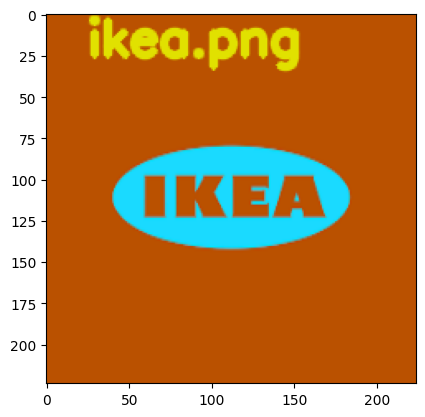

In [39]:
predict("ikea.png",model,classes)